## **Advance Lane Line Detection** 
---
[image01]: ./images/Chess_Image.PNG
[image02]: ./images/Correct_Distortion.PNG
[image03]: ./images/Birds_Eye.PNG
[image04]: ./images/Gradient_Thresholding.PNG
[image05]: ./images/S_Thresholding.PNG
[image06]: ./images/Combined.PNG
[image07]: ./images/Sliding_Window.PNG
[image08]: ./images/Sliding_Window_1.PNG
[image09]: ./images/Chess_Corrected.PNG
[image10]: ./images/Mapping_Lanes.PNG
[image11]: ./images/Radius.PNG
[image12]: ./images/Histogram.PNG



### 1. Loading Chessboard Data

- Below cell reads the chessboard images from the given path
- Stores the chessboard images in a list and return the list
- This chessboard images is then used for camera calibration
![ScreenShot][image01]


### 2. Camera Calibration


#### Camera Calibration: To compute the transformation between 3D object points in the world and 2D image points

#### Below cell performs the camera calibration

- I started by preparing **"object points"**, which will be the (x, y, z) coordinates of the chessboard corners in the world.
- Here I am assuming chessboard is fixed on (x, y) plane at z=0, such that object points are same for each calibration image.
- Thus, **`objp`** is just a replicated array of coordinates.
- **`objpoints`** will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.
- **`imgpoints`** will be appended with (x, y) pixel position of each of corners in image plane with each successful chessboard detection.
- I then used the output **`objpoints`** and **`imgpoints`** to compute the **`camera calibration`** and **`distortion coefficients`** using the **`cv2.calibrateCamera()`** function.
- The **`cv2.calibrateCamera()`** function is used in Cell number 4, Line Number 40

### 3. Distortion Correction

- To ensure that the geometrical shape of object is represented consistently, no matter where they appear in an image I perform 
- Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image **Distortion Correction**.
- This transformation by camers isn’t perfect
- Distortion actually changes what the shape and size of these 3D objects appear to be
- So, I need to undo this distortion
- I will use **Camera calibration parameters** for undistorting a distorted image
- Below is example of distorted images at left 
- Right image is undistorted image of the left image which is caluclated by **camera calibration matrix** and **distortion coefficients**
- To compute the undistorted image  **`cv2.undistort()`** function is used
![ScreenShot][image09]


### 4. Distortion-corrected image Example
- Below is another example of distorted images at left of lane image 
- Right image is undistorted image of the left image
![ScreenShot][image02]

### 5. Defining the Source and Destination points for perspective transformation


| Source         | Destination   | 
|:-------------: |:-------------:| 
| 575,  464      | 450, 0        | 
| 707,  464      | 450, 720      |
| 258,  682      | 830, 720      |
| 1049, 682      | 830, 0        |




### 6. Perspective Transform

- A perspective transform maps the points in a given image to different, desired, image points with a new perspective
- The perspective transform to get a bird’s-eye view transform that let’s us view a lane from above
- The **`src`** points in the below code are mapped to **`dst`** points in a different perspective image 
- First I will find the perspective transformation matrix from the **`src`** and **`dst`** points
- I used the **`cv2.getPerspectiveTransform()`** function for getting the transformation matrix Cell 9, Line number 4.
- After calculating transformation matrix **`M`** we will perform transformation using **`cv2.warpPerspective`** function in Cell 9, Line number 7 
![ScreenShot][image03]



### 7. Gradient Thresholding 

- We want to find vertical lines because lane lines are vertical
- I applied Sobel Operator in x direction
- Applying Sobel in x direction gives us vertical lines
- Applied thresholding so that we get only lane lines and discard other lines
- 65 is the minimum threshold value and 255 is maximum threshold value
- All the pixels below 65 are discarded
- You can see the results below
![ScreenShot][image04]

 
### 8. Color Thresholding

- By applying gradient thresholding we loose color information
- This is because we convert the image to grayscale
- We will now explore HLS space
- In HLS space the S channel helps in finding the vertical lane lines
- S channel does a fairly robust job of picking up the lines under very different color and contrast conditions
- 125 is the minimum threshold value and 255 is maximum threshold value
- All the pixels below 125 are discarded
- You can see the results below
![ScreenShot][image05]


### 9. Color and Gradient

- S channel does a fairly robust job of picking up the lines under very different color and contrast conditions
- But S chennel does not detect lanes that are far away
- The far away lane lines are detected by applying gradient threshold in x -direction
- I combine color and gradient thresholding to get the best of both worlds
- Here's an example of how that might look
- Red pixels are results of applying gradient thresholding
- Blue pixels are results of applying color thresholding to S channel
![ScreenShot][image06]


### 10. Locate the Lane Lines and Fit a Polynomial


- I  need to decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line
- I used sliding window method to fit a second order polynomial
- I first take a histogram along all the columns in the lower half of the image 
- In my thresholded binary image, pixels are either 0 or 1
- So two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines.
- I can use that as a starting point for where to search for the lines
-  From that point, I can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame.
- After finding the lane line pixels, I simply use np.polyfit to fit the lane line pixels to a second order polynomial
![ScreenShot][image07]
![ScreenShot][image08]

### 11. Visualizing the histogram of grayscale Combined Image

- Below is example of histogram along all the columns in the lower half of the image 

![ScreenShot][image12]






### 12. Radius of curvature of the fit

- we'll compute the radius of curvature of the fit.
- we have located lane line pixel
- used their x and y pixel positions to fit a second order polynomial curve:
$$f(y) = {Ay^2 + By + C}.$$
- Radius of curvature at any point x of the function x = f(y) is:
$$R_ {curve} = {[1 + (\frac{dy}{dx})^2]^{3/2} \over |\frac{d^2y}{dx^2}|}.$$
- In the case of the second order polynomial above, the first and second derivatives are: 
$$f'(y) = {\frac{dy}{dx}} = {2Ay + B }.$$
$$f''(y) = {\frac{d^2y}{dx^2}} = {2A}.$$
- So, our equation for radius of curvature becomes:
$$R_ {curve} = {[1 + ({2Ay + B })^2]^{3/2} \over |{2A}|}.$$

- we actually need to perform this calculation after converting our x and y values to real world space.
-  x and y values are converted to real world space in Cell 24, Line number 3 and 4
- The above equation is calculated in Cell 24, Line number 27 and 28

![ScreenShot][image10]
![ScreenShot][image11]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
%matplotlib inline

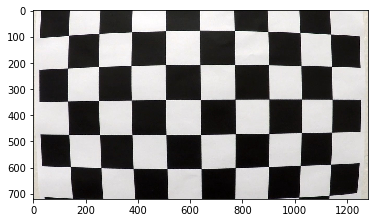

In [2]:
test_img = mpimg.imread("camera_cal\calibration1.jpg")
img = test_img
plt.imshow(img)
# for calibration1 (5, 9)

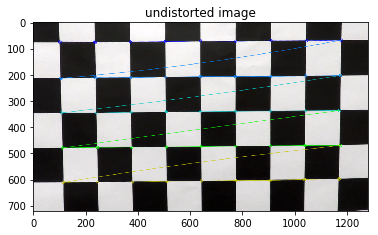

In [3]:
obj_pts = []  # 3D points in real world space (x, y, z)
img_pts = []  # 2D points in image plane

# Prepare object points like (0, 0, 0), (1, 0, 0), (2, 0, 0) ..., (7, 5, 0)
objp = np.zeros((5*9, 3), np.float32)
objp[:, :2] = np.mgrid[0: 9, 0: 5].T.reshape(-1, 2)  # x, y coordinates

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (9, 5), None)

# If corners are found, add object points, image points
if ret == True:
    img_pts.append(corners)
    obj_pts.append(objp)
    
    # draw and displat the corner
    img = cv2.drawChessboardCorners(img, (9, 5), corners, ret)
    plt.imshow(img)
    
    ret, cam_mtx, distotion_coeffs, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, gray.shape[::-1], None, None)
    # cam_mtx = camera matrix to transform 3d object points to 2D image points
    # distotion_coeffs = camera distortion coefficients
    # pos of camers in the world by its rotation matrix(rvecs)
    # and translations matrix(tvecs)

    dst = cv2.undistort(img, cam_mtx, distotion_coeffs, None, cam_mtx)
    plt.imshow(dst)
    plt.title("undistorted image")

### 1. Camera Calibration


#### Camera Calibration: To compute the transformation between 3D object points in the world and 2D image points

#### Below cell performs the camera calibration

- I started by preparing **"object points"**, which will be the (x, y, z) coordinates of the chessboard corners in the world.
- Here I am assuming chessboard is fixed on (x, y) plane at z=0, such that object points are same for each calibration image.
- Thus, **`objp`** is just a replicated array of coordinates.
- **`objpoints`** will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.
- **`imgpoints`** will be appended with (x, y) pixel position of each of corners in image plane with each successful chessboard detection.
- I then used the output **`objpoints`** and **`imgpoints`** to compute the **`camera calibration`** and **`distortion coefficients`** using the **`cv2.calibrateCamera()`** function.
- The **`cv2.calibrateCamera()`** function is used in Cell number 4, Line Number 40


In [4]:
def calculate_parameters(imgs):
    """
    Calculates the Camera matrix and Distorion Coefficients

    Parameters
    ----------
    imgs : list of images

    Returns
    -------
    cam_mtx : numpy array
              camera matrix to transform 3d object points to 2D image points
              
    distotion_coeffs : numpy array
                       camera distortion coefficients
    """
    obj_pts = []  # 3D points in real world space (x, y, z)
    img_pts = []  # 2D points in image plane
    
    # Prepare object points like (0, 0, 0), (1, 0, 0), (2, 0, 0) ..., (7, 5, 0)
    objp = np.zeros((6*9, 3), np.float32)
    objp[:, :2] = np.mgrid[0: 9, 0: 6].T.reshape(-1, 2)  # x, y coordinates
    for img in imgs:
        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        # If corners are found, add object points, image points
        if ret == True:
            
            img_pts.append(corners)
            obj_pts.append(objp)
    
    # cam_mtx = camera matrix to transform 3d object points to 2D image points
    # distotion_coeffs = camera distortion coefficients
    # pos of camers in the world by its rotation matrix(rvecs)
    # and translations matrix(tvecs)
    reti, cam_mtx, distotion_coeffs, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, gray.shape[::-1], None, None)   

    return cam_mtx, distotion_coeffs

### 2. Loading Chessboard Data

- Below cell reads the chessboard images from the given path
- Stores the chessboard images in a list and return the list
- This chessboard images is then used for camera calibration

In [5]:
import glob

def read_data(path):
    """
    Loads the images and returns the list of images 

    Parameters
    ----------
    path : string
           path from where the images are to be read

    Returns
    -------
    imgs : list
           list of images
    """
    imgs = []
    for filename in glob.iglob(path+"/*.jpg", recursive=True):
        img = mpimg.imread(filename)
        imgs.append(img)
    return imgs 

In [6]:
def display_image(img_1, img_2, title_1, title_2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(img_1)
    ax1.set_title(title_1, fontsize=30)
    ax2.imshow(img_2)
    ax2.set_title(title_2, fontsize=30)
    plt.tight_layout()
    plt.show()
    

In [7]:
def testing_parameters(cam_mtx, distotion_coeffs, img):

    dst = cv2.undistort(img, cam_mtx, distotion_coeffs, None, cam_mtx)
    display_image(img, dst, 'Original Image', 'Undistorted Image') 

In [8]:
def get_undistorted_imgs(cam_mtx, distotion_coeffs, img_list):
    dst_imgs = []
    for img in img_list:
        dst = cv2.undistort(img, cam_mtx, distotion_coeffs, None, cam_mtx)
        dst_imgs.append(dst)
    return dst_imgs    

### Perspective Transform

- A perspective transform maps the points in a given image to different, desired, image points with a new perspective
- The perspective transform to get a bird’s-eye view transform that let’s us view a lane from above
- The **`src`** points in the below code are mapped to **`dst`** points in a different perspective image 
- First I will find the perspective transformation matrix from the **`src`** and **`dst`** points
- I used the **`cv2.getPerspectiveTransform()`** function for getting the transformation matrix Cell 9, Line number 4.
- After calculating transformation matrix **`M`** we will perform transformation using **`cv2.warpPerspective`** function in Cell 9, Line number 7 


In [9]:
def unwarp(img, src, dst, testing):
    h,w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    
    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        f.subplots_adjust(hspace = .2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
        y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h,0])
        ax1.set_xlim([0,w])
        ax1.set_title('Undistorted Image', fontsize=30)
        ax2.imshow(warped)
        ax2.set_title('Unwarped Image', fontsize=30)
    
    else:
        return warped, M, Minv

In [10]:
imgs = read_data("camera_cal")
cam_mtx, coeffs = calculate_parameters(imgs)

### 2. Distortion Correction

- To ensure that the geometrical shape of object is represented consistently, no matter where they appear in an image I perform 
- Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image **Distortion Correction**.
- This transformation by camers isn’t perfect
- Distortion actually changes what the shape and size of these 3D objects appear to be
- So, I need to undo this distortion
- I will use **Camera calibration parameters** for undistorting a distorted image
- Below is example of distorted images at left 
- Right image is undistorted image of the left image which is caluclated by **camera calibration matrix** and **distortion coefficients**
- To compute the undistorted image  **`cv2.undistort()`** function is used


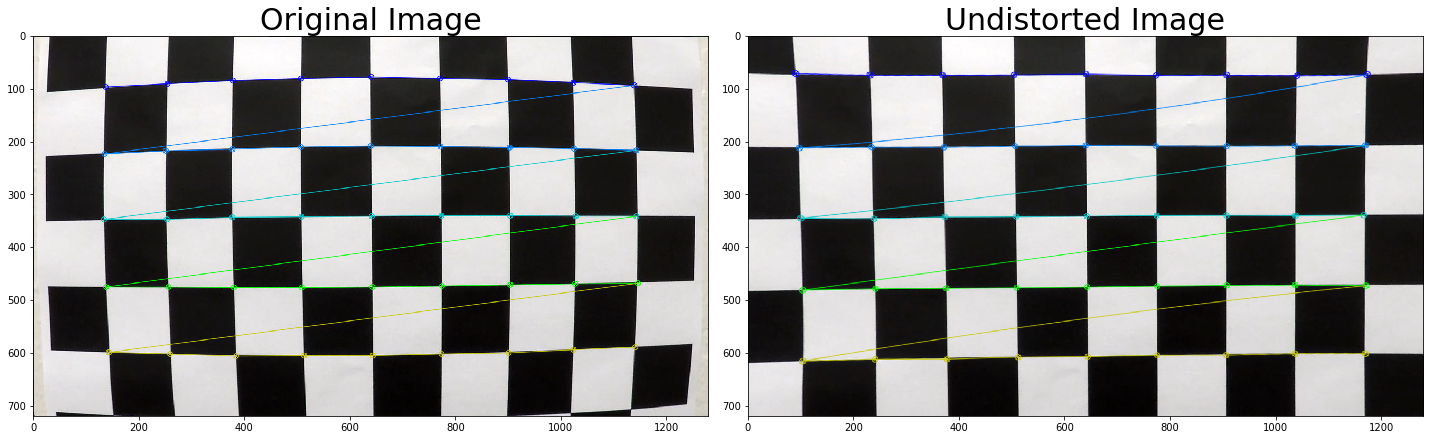

In [11]:
testing_parameters(cam_mtx, coeffs, img)

### 4. Distortion-corrected image Example
- Below is another example of distorted images at left of lane image 
- Right image is undistorted image of the left image 

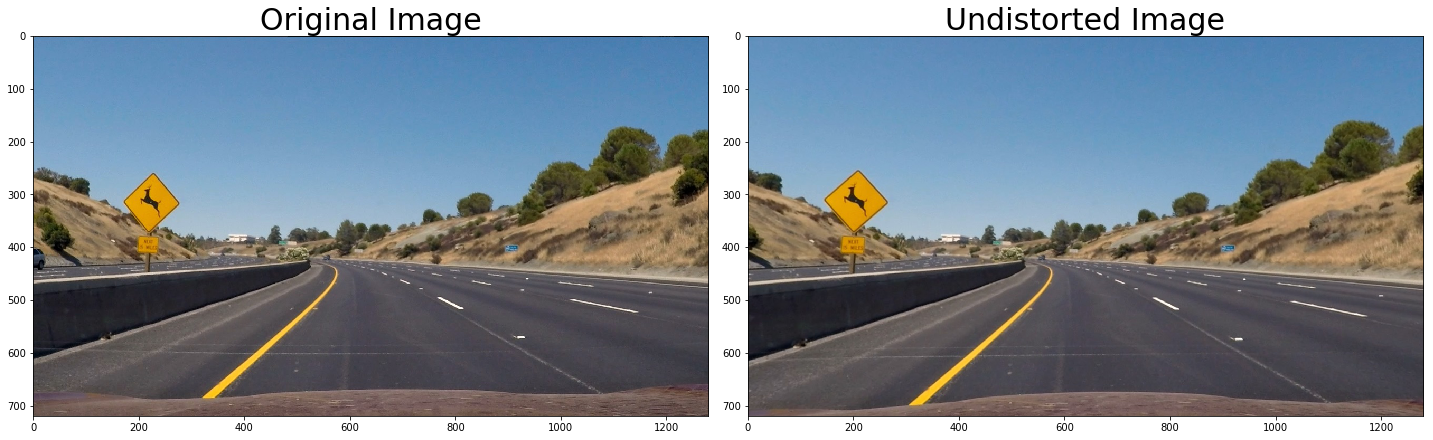

In [12]:
imgs = read_data("test_images")
testing_parameters(cam_mtx, coeffs, imgs[3])

### Computing Undistorted Images for all

- In below cell I am computing distorted corrected images for all the lane images

In [13]:
imgs = get_undistorted_imgs(cam_mtx, coeffs, imgs)
h,w = imgs[3].shape[:2]

### Defining the Source and Destination points for perspective transformation

In [14]:
src = np.float32([(575,464),
                  (707,464), 
                  (258,682), 
                  (1049,682)])

dst = np.float32([(450,0),
                  (w-450,0),
                  (450,h),
                  (w-450,h)])


- Below is example of perspective transformation. 
- The undistorted image is shown in the left side
- Right side is example of bird's eye view image

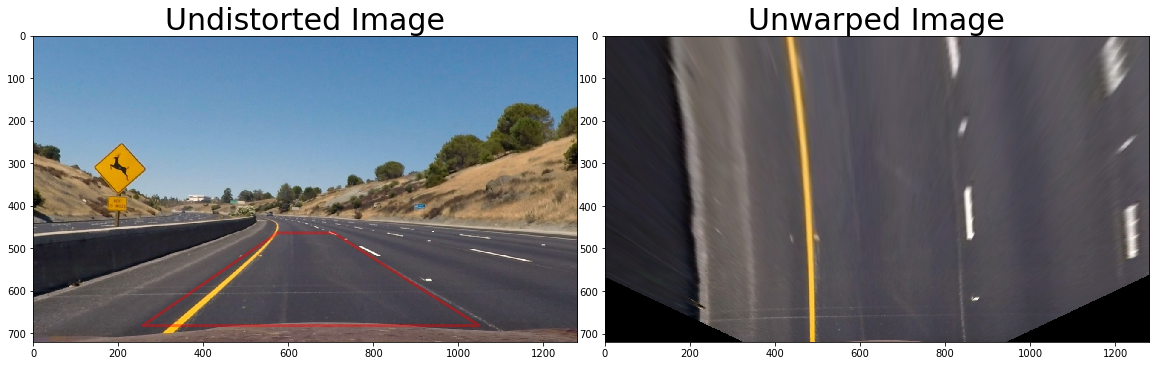

In [15]:
unwarp(imgs[3], src, dst, True)

### Gradient Thresholding 

- We want to find vertical lines because lane lines are vertical
- I applied Sobel Operator in x direction
- Applying Sobel in x direction gives us vertical lines
- Applied thresholding so that we get only lane lines and discard other lines
- 65 is the minimum threshold value and 255 is maximum threshold value
- All the pixels below 65 are discarded
- You can see the results below


1


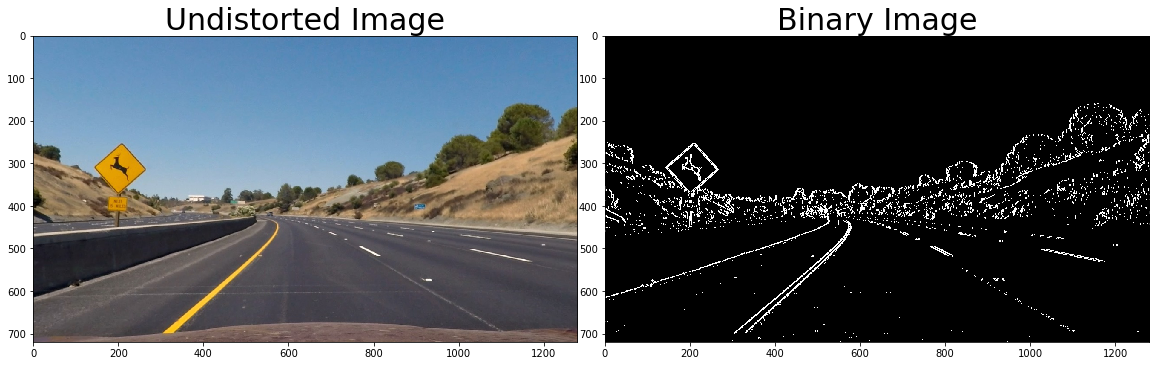

In [16]:
def abs_sobel_thresh(img, orient='x', thresh_min=25, thresh_max=255, testing = True):
    # Apply the following steps to img
    warp = np.copy(img)  # unwarp(img, src, dst, False)
    
    # 1) Convert to Gray Scale 
    gray = (cv2.cvtColor(warp, cv2.COLOR_RGB2GRAY))
    
    # 2) Take the derivative in x direction
    sobel = cv2.Sobel(gray, cv2.CV_64F,  1, 0) 
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary # Remove this line
   

    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        f.subplots_adjust(hspace = .2, wspace=.05)
        ax1.imshow(warp)
        ax1.set_title('Undistorted Image', fontsize=30)
        ax2.imshow(binary_output, cmap='gray')
        ax2.set_title('Binary Image', fontsize=30)
    # Return the result
    return binary_output
        

sobel_x = abs_sobel_thresh(imgs[3])
print(np.max(sobel_x))

### Color Thresholding

- By applying gradient thresholding we loose color information
- This is because we convert the image to grayscale
- We will now explore HLS space
- In HLS space the S channel helps in finding the vertical lane lines
- S channel does a fairly robust job of picking up the lines under very different color and contrast conditions
- 125 is the minimum threshold value and 255 is maximum threshold value
- All the pixels below 125 are discarded
- You can see the results below

1


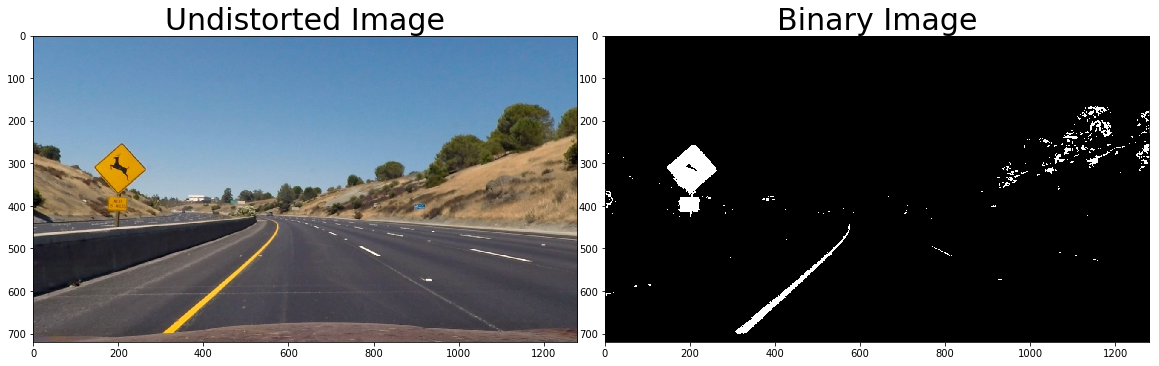

In [17]:
def hls_thresh(img, orient='x', thresh_min=125, thresh_max=255, testing = True):
    # Apply the following steps to img
    warp = np.copy(img)  # unwarp(img, src, dst, False)
    
    # 1) Convert to HLS space
    hls = cv2.cvtColor(warp, cv2.COLOR_RGB2HLS).astype(np.float)
    
    # 2) Extract S channel
    s_channel = hls[:,:,2]
    
    # 3) Define array of zeros with same shape as s_channel   
    binary_output = np.zeros_like(s_channel)

    # 3) Apply thresholding to s_channel 
    binary_output[(s_channel > thresh_min) & (s_channel <= thresh_max)] = 1

    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    binary_output = 255*binary_output
    binary_output = np.uint8(binary_output/np.max(binary_output))

    
    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        f.subplots_adjust(hspace = .2, wspace=.05)
        ax1.imshow(warp)
        ax1.set_title('Undistorted Image', fontsize=30)
        ax2.imshow(binary_output, cmap="gray")
        ax2.set_title('Binary Image', fontsize=30)
    
    # 5) Return the result
    return binary_output
        
    
s_binary = hls_thresh(imgs[3])
print(np.max(s_binary))

### Color and Gradient

- S channel does a fairly robust job of picking up the lines under very different color and contrast conditions
- But S chennel does not detect lanes that are far away
- The far away lane lines are detected by applying gradient threshold in x -direction
- I combine color and gradient thresholding to get the best of both worlds
- Here's an example of how that might look
- Red pixels are results of applying gradient thresholding
- Blue pixels are results of applying color thresholding to S channel

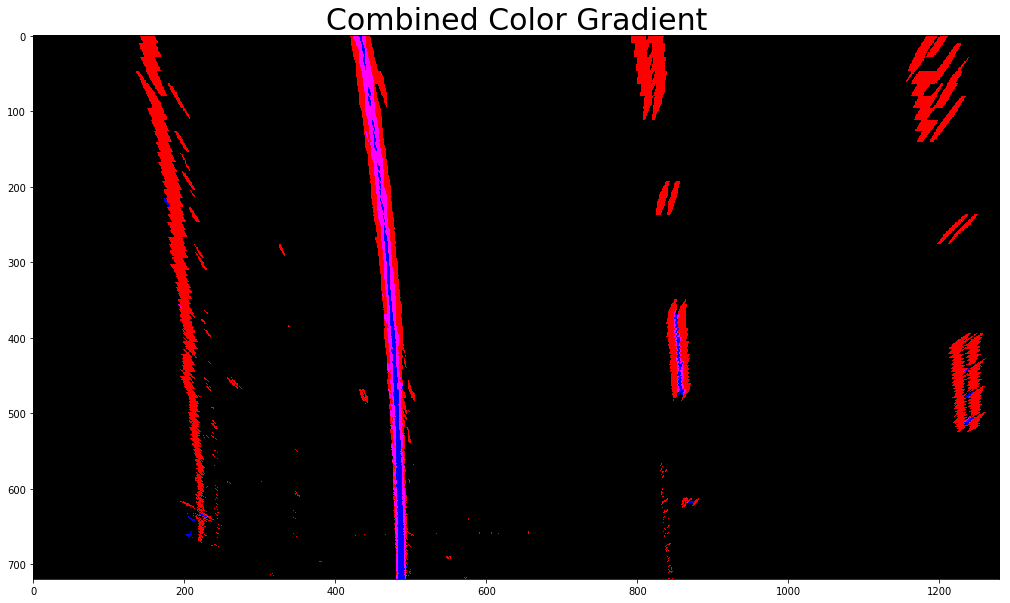

In [18]:
def combine_color_gradient(x_sobel, s_binary, testing):
    x_sobel, M, Minv = unwarp(x_sobel, src, dst, False)
    s_binary, M, Minv = unwarp(s_binary, src, dst, False)
    # print(np.max(x_sobel))
    # print(np.max(s_binary))
    
    color_binary = np.dstack((x_sobel, np.zeros_like(s_binary), s_binary)) * 255
    
    if testing:
        f, ax1 = plt.subplots(1, 1, figsize=(20,10))
        ax1.imshow(color_binary)
        ax1.set_title('Combined Color Gradient', fontsize=30)
    return color_binary, M, Minv
    
combined_img, M, Minv = combine_color_gradient(sobel_x, s_binary, True)

In [19]:
def visualize_data(img):
    margin = 60
    
    img = img/255.0
    out_img = np.zeros(img.shape, np.float32)   #  np.copy(img)  
    window_img = np.zeros_like(out_img)
    
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)

### Locate the Lane Lines and Fit a Polynomial


- I  need to decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line
- I used sliding window method to fit a second order polynomial
- I first take a histogram along all the columns in the lower half of the image 
- In my thresholded binary image, pixels are either 0 or 1
- So two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines.
- I can use that as a starting point for where to search for the lines
-  From that point, I can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame.
- After finding the lane line pixels, I simply use np.polyfit to fit the lane line pixels to a second order polynomial

In [20]:
def sliding_window_polyfit(img, testing):
    # img = img/255.0
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    histogram = np.sum(img[int(img.shape[0]/2):, :], axis=0)
    
    if testing:
        plt.plot(histogram)
        plt.show()
    
    # print(histogram)
    # Create an output image to draw on and  visualize the result
    out_img = np.zeros_like(img)  #np.dstack((img, img, img))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    # midpoint = 200
    leftx_base = np.argmax(histogram[0:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # print(leftx_base, rightx_base)
    # Choose the number of sliding windows
    nwindows = 20
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    rects = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high), (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high), (0,255,0), 2)
        
        rects.append([win_xleft_low, win_y_low, win_xleft_high, win_y_high, win_xright_low, win_xright_high])
        
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
        (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
        (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    # because left_lane_inds is list of list
    # ans we want to make it numpy array but not as list of list
    # but all list concatenated as once
    # for example in this example we have 20 list of inside left_lane_inds
    # we want all 20 indices to be concatenated into one numpy array


    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    # print(lefty.shape, leftx.shape)
    try:
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
    except:
        left_fit = None
        right_fit = None
        plt.imshow(img)

    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, rects

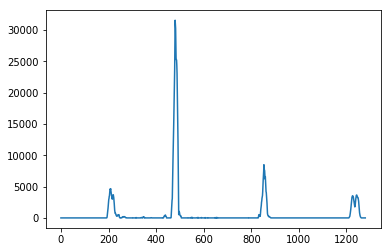

In [21]:
left_fit, right_fit, left_lane_inds, right_lane_inds, rects = sliding_window_polyfit(combined_img, True)


(720, 0)

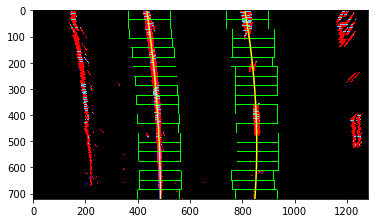

In [22]:
h = combined_img.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
#print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)



# Create an output image to draw on and  visualize the result
out_img = np.copy(combined_img)  # np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, combined_img.shape[0]-1, combined_img.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

for rect in rects:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[0],rect[1]),(rect[2],rect[3]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[1]),(rect[5],rect[3]),(0,255,0), 2) 
    
# Identify the x and y positions of all nonzero pixels in the image
nonzero = combined_img.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

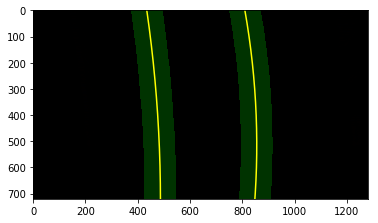

In [23]:
visualize_data(combined_img)

### Radius of curvature of the fit

- we'll compute the radius of curvature of the fit.
- we have located lane line pixel
- used their x and y pixel positions to fit a second order polynomial curve:
$$f(y) = {Ay^2 + By + C}.$$
- Radius of curvature at any point x of the function x = f(y) is:
$$R_ {curve} = {[1 + (\frac{dy}{dx})^2]^{3/2} \over |\frac{d^2y}{dx^2}|}.$$
- In the case of the second order polynomial above, the first and second derivatives are: 
$$f'(y) = {\frac{dy}{dx}} = {2Ay + B }.$$
$$f''(y) = {\frac{d^2y}{dx^2}} = {2A}.$$
- So, our equation for radius of curvature becomes:
$$R_ {curve} = {[1 + ({2Ay + B })^2]^{3/2} \over |{2A}|}.$$

- we actually need to perform this calculation after converting our x and y values to real world space.
-  x and y values are converted to real world space in Cell 24, Line number 3 and 4
- The above equation is calculated in Cell 24, Line number 27 and 28

In [24]:
def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist

In [25]:

rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(cv2.cvtColor(combined_img, cv2.COLOR_BGR2GRAY), left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example:', rad_l, 'm,', rad_r, 'm')
print('Distance from lane center for example:', d_center, 'm')

Radius of curvature for example: 481.1246118 m, 278.430588019 m
Distance from lane center for example: -0.269124353218 m


In [26]:
def draw_lane(original_img, binary_img, l_fit, r_fit, Minv, testing):
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)
    
   
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 

    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    
    if testing:
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
        f.subplots_adjust(hspace = .2, wspace=.05)
        ax1.imshow(color_warp)
        ax1.set_title('color_warp', fontsize=30)
        ax2.imshow(newwarp)
        ax2.set_title('newwarp', fontsize=30)
        ax3.imshow(result)
        ax3.set_title('result', fontsize=30)
        plt.tight_layout()
        
    return result

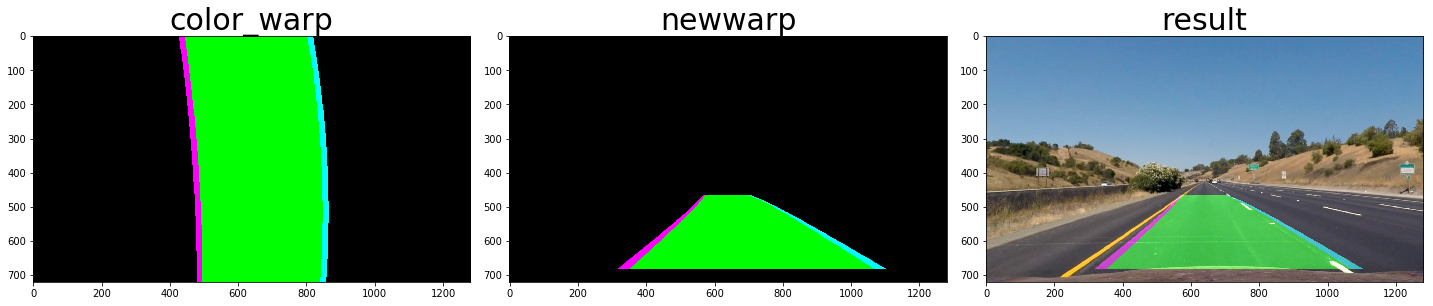

In [27]:
combined_bin = cv2.cvtColor(combined_img, cv2.COLOR_BGR2GRAY)
result_img = draw_lane(imgs[0], combined_bin, left_fit, right_fit, Minv, True)
# plt.imshow(combined_img)

In [28]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img

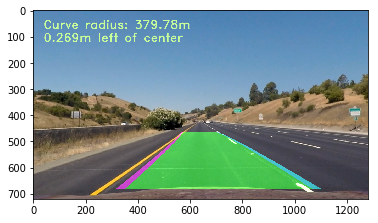

In [29]:
result_img = draw_data(result_img, (rad_l+rad_r)/2, d_center)
plt.imshow(result_img)

In [30]:
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds

In [31]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)

In [32]:
def process_image(img):
    new_img = np.copy(img)
    x_sob = abs_sobel_thresh(new_img, 'x', 65, 255, False)
    s_cha = hls_thresh(img, 'x', 125, 255, False)
    combined_img, M, Minv = combine_color_gradient(x_sob, s_cha, False)
    img_bin = cv2.cvtColor(combined_img, cv2.COLOR_BGR2GRAY)
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, _ = sliding_window_polyfit(combined_img, False)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = polyfit_using_prev_fit(combined_img, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(350 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_lane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv, False)
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(combined_img, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds)
        img_out = draw_data(img_out1, (rad_l+rad_r)/2, d_center)
    else:
        img_out = new_img
    
    return img_out

In [33]:
def plot_fit_onto_img(img, fit, plot_color):
    if fit is None:
        return img
    new_img = np.copy(img)
    h = new_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    plotx = fit[0]*ploty**2 + fit[1]*ploty + fit[2]
    pts = np.array([np.transpose(np.vstack([plotx, ploty]))])
    cv2.polylines(new_img, np.int32([pts]), isClosed=False, color=plot_color, thickness=8)
    return new_img


In [34]:
l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

C:\Users\jaysh\Anaconda3\lib\site-packages\moviepy\audio\io\readers.py:110: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.nchannels))



MoviePy: building video file project_video_output.mp4
----------------------------------------

Writing video into project_video_output.mp4


100%|██████████████████████████████████████████████████████████████████████████████| 1210/1210 [04:43<00:00,  5.40it/s]


Done writing video in project_video_output.mp4 !
Your video is ready !
Wall time: 4min 44s


In [35]:
exit()